In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Import data
df = pd.read_csv("../data/original_data_file.csv")
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,choose_one,choose_one:confidence,choose_one_gold,keyword,location,text,tweetid,userid,target
0,778243823,True,golden,156,NaN,Relevant,1.0000,Relevant,NaN,NaN,Just happened a terrible car crash,1.0,NaN,1
1,778243824,True,golden,152,NaN,Relevant,1.0000,Relevant,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,13.0,NaN,1
2,778243825,True,golden,137,NaN,Relevant,1.0000,Relevant,NaN,NaN,"Heard about #earthquake is different cities, s...",14.0,NaN,1
3,778243826,True,golden,136,NaN,Relevant,0.9603,Relevant,NaN,NaN,"there is a forest fire at spot pond, geese are...",15.0,NaN,1
4,778243827,True,golden,138,NaN,Relevant,1.0000,Relevant,NaN,NaN,Forest fire near La Ronge Sask. Canada,16.0,NaN,1


In [4]:
# Stats
print("Number of Entries: {}".format(df.shape[0]))
print("Number of 0's: {}".format(df.loc[df['target'] == 0].shape[0]))
print("Number of 1's: {}".format(df.loc[df['target'] == 1].shape[0]))
print("1's Percent: {}".format(df.loc[df['target'] == 1].shape[0]/df.shape[0]))
print("Average Judgments: {:.2f}".format(df['_trusted_judgments'].mean()))
print("Average Confidence: {:.2f}".format(df['choose_one:confidence'].mean()))
print("Min Confidence: {:.2f}".format(df['choose_one:confidence'].min()))

Number of Entries: 10876
Number of 0's: 6203
Number of 1's: 4673
1's Percent: 0.4296616403089371
Average Judgments: 6.02
Average Confidence: 0.84
Min Confidence: 0.33


In [5]:
def threshold(df, col, t):
    return df.loc[df[col] >= t]

Text(0.5, 1.0, 'Samples vs Min Confidence')

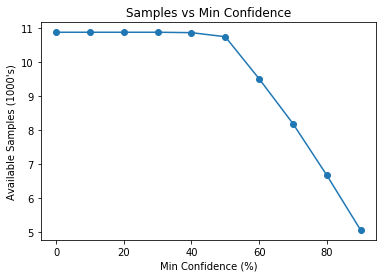

In [11]:
col = 'choose_one:confidence'
samples = []
for i in range(10):
    samples.append(len(threshold(df,col, i/10)))
    
plt.plot((np.arange(10))*10, np.array(samples)/1000, '-o')
plt.xlabel("Min Confidence (%)")
plt.ylabel("Available Samples (1000's)")
plt.title("Samples vs Min Confidence")

Text(0.5, 1.0, 'Samples vs Num Judgments')

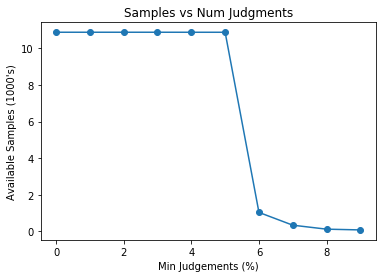

In [14]:
col = '_trusted_judgments'
samples = []
for i in range(10):
    samples.append(len(threshold(df,col, i)))
    
plt.plot((np.arange(10)), np.array(samples)/1000, '-o')
plt.xlabel("Min Judgements (%)")
plt.ylabel("Available Samples (1000's)")
plt.title("Samples vs Num Judgments")

In [20]:
df_rel = df.loc[df['choose_one'] == 'Relevant']
# "Releveant Data" Stats
print("Number of Entries: {}".format(df_rel.shape[0]))
print("Number of 0's: {}".format(df_rel.loc[df_rel['target'] == 0].shape[0]))
print("Number of 1's: {}".format(df_rel.loc[df_rel['target'] == 1].shape[0]))
print("1's Percent: {}".format(df_rel.loc[df_rel['target'] == 1].shape[0]/df_rel.shape[0]))
print("Average Judgments: {:.2f}".format(df_rel['_trusted_judgments'].mean()))
print("Average Confidence: {:.2f}".format(df_rel['choose_one:confidence'].mean()))
print("Min Confidence: {:.2f}".format(df_rel['choose_one:confidence'].min()))


Number of Entries: 4673
Number of 0's: 0
Number of 1's: 4673
1's Percent: 1.0
Average Judgments: 6.44
Average Confidence: 0.84
Min Confidence: 0.33


In [4]:
# Import data
df_train = pd.read_csv("./train.csv")
df_train.shape[0]

7612

In [33]:
# Train Stats
print("Number of Entries: {}".format(df_train.shape[0]))
print("Number of 0's: {}".format(df_train.loc[df_train['target'] == 0].shape[0]))
print("Number of 1's: {}".format(df_train.loc[df_train['target'] == 1].shape[0]))
print("1's Percent: {}".format(df_train.loc[df_train['target'] == 1].shape[0]/df_train.shape[0]))

Number of Entries: 7612
Number of 0's: 4373
Number of 1's: 3239
1's Percent: 0.4255123489227535
